In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_internship_data.csv')

# EDA

In [3]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

### Data Fields Description

- **User ID**: A unique identifier for each user.
- **User Name**: The name of the user.
- **Driver Name**: The name of the taxi driver.
- **Car Condition**: The condition of the taxi car.
- **Weather**: Information about the weather conditions during the trip.
- **Traffic Condition**: Information about the traffic conditions during the trip.
- **Key**: A unique identifier for each trip.
- **Fare Amount**: The fare amount charged for the trip.
- **Pickup Datetime**: The date and time when the trip started.
- **Pickup Longitude**: The longitude coordinate of the pickup location.
- **Pickup Latitude**: The latitude coordinate of the pickup location.
- **Dropoff Longitude**: The longitude coordinate of the dropoff location.
- **Dropoff Latitude**: The latitude coordinate of the dropoff location.
- **Passenger Count**: The number of passengers in the taxi.
- **Hour**: The hour of the day when the trip started.
- **Day**: The day of the month when the trip started.
- **Month**: The month when the trip started.
- **Weekday**: The day of the week when the trip started.
- **Year**: The year when the trip started.
- **JFK Distance**: The distance from the pickup location to John F. Kennedy International Airport.
- **EWR Distance**: The distance from the pickup location to Newark Liberty International Airport.
- **LGA Distance**: The distance from the pickup location to LaGuardia Airport.
- **SOL Distance**: The distance from the pickup location to the Statue of Liberty.
- **NYC Distance**: The distance from the pickup location to the center of New York City.
- **Distance**: The total distance of the trip.
- **Bearing**: The direction of travel from the pickup point to the dropoff point.


In [5]:
data.shape

(500000, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [7]:
data.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [8]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


from the previous describtion we can conclude that bearing means the direction the car is moving in as in north, south, east and west and whats between since the min and max value is 3.14159 which is the pi number so it basically represent the circular coordinates compass

In [9]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'{column} has {unique_values} unique values')
    print()

User ID has ['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5'] unique values

User Name has ['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson'] unique values

Driver Name has ['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana'] unique values

Car Condition has ['Very Good' 'Excellent' 'Bad' 'Good'] unique values

Weather has ['windy' 'cloudy' 'stormy' 'sunny' 'rainy'] unique values

Traffic Condition has ['Congested Traffic' 'Flow Traffic' 'Dense Traffic'] unique values

key has ['2009-06-15 17:26:21.0000001' '2010-01-05 16:52:16.0000002'
 '2011-08-18 00:35:00.00000049' ... '2014-08-25 00:22:20.0000001'
 '2015-01-12 12:17:32.0000001' '2010-04-12 23:46:58.0000002'] unique values

fare_amount has [ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ] unique values

pickup_datetime has ['2009-06-15 17:26:21' '2010-01-05 16:52:16' '2011-08-18 00:35:00' ...
 '2014-08-25 00:22:20

# Visualizations

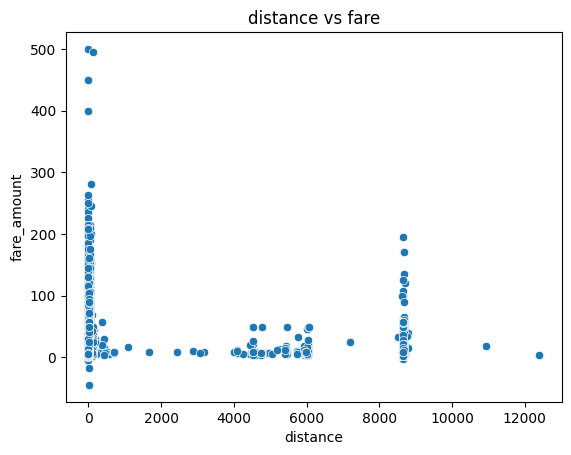

In [10]:
sns.scatterplot(data=data, x='distance', y='fare_amount')
plt.title('distance vs fare')
plt.show()

There are a few outliers on the graph, which are points that are far away from the overall trend. These outliers may represent taxi rides that were taken during rush hour or taxi rides that were to a remote location.

In [11]:
#Divide year and month parts
data['montly_quarter']=data.month.map({1:'Q1',2:'Q1',3:'Q1',
                                   4:'Q2',5:'Q2',6:'Q2',
                                   7:'Q3',8:'Q3',9:'Q3',
                                   10:'Q4',11:'Q4',12:'Q4'})

data['Hourly_Segments'] = data.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H1',5:'H1',6:'H2',7:'H2',8:'H2',
                                     9:'H2',10:'H2',11:'H2',12:'H3',13:'H3',14:'H3',15:'H3',16:'H3',
                                     17:'H3',18:'H4',19:'H4',20:'H4',21:'H4',22:'H4',23:'H4'})

<Axes: xlabel='bearing', ylabel='Count'>

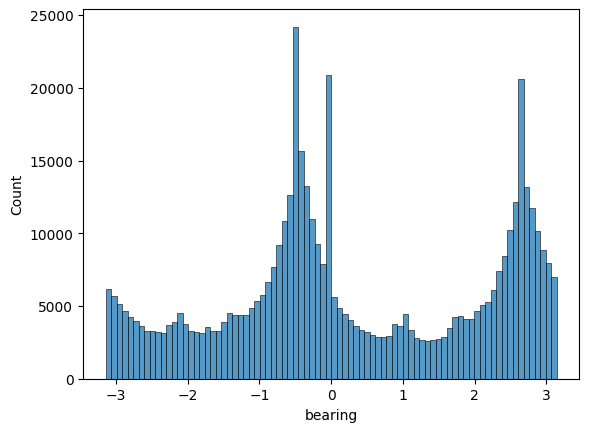

In [12]:
sns.histplot(data["bearing"])

three prominent peaks at approximately -0.5, 0, and 2.5. These peaks indicate the most common directions of travel in the dataset

In [13]:
data['counter'] = 1

In [14]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'montly_quarter', 'Hourly_Segments',
       'counter'],
      dtype='object')

In [15]:
uberData = pd.read_csv('final_internship_data.csv')

In [16]:
uberData.dropna(inplace=True)
uberData.isnull().sum()


User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [17]:
uberData = uberData.drop(['User ID','User Name','Driver Name', 'pickup_datetime','key'], axis=1)

In [18]:
uberData.dtypes

Car Condition         object
Weather               object
Traffic Condition     object
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

<h4> Now we label encode the cars condition, weather and traffic condition columns.</h4>

In [19]:
uberData['Car Condition'].unique()

array(['Very Good', 'Excellent', 'Bad', 'Good'], dtype=object)

In [20]:
uberData['Car Condition'] = uberData['Car Condition'].map({'Very Good': 3, 'Excellent': 4, 'Good': 2, 'Bad': 1})


In [21]:
uberData['Weather'].unique()

array(['windy', 'cloudy', 'stormy', 'sunny', 'rainy'], dtype=object)

In [22]:
uberData['Weather'] = uberData['Weather'].map({'windy': 1, 'cloudy': 2, 'stormy': 3, 'sunny': 4, 'rainy': 5})


In [23]:
uberData['Traffic Condition'].unique()

array(['Congested Traffic', 'Flow Traffic', 'Dense Traffic'], dtype=object)

In [24]:
uberData['Traffic Condition'] = uberData['Traffic Condition'].map({'Congested Traffic': 1,'Flow Traffic': 3,'Dense Traffic': 2})



Text(95.72222222222221, 0.5, 'Values in dataset')

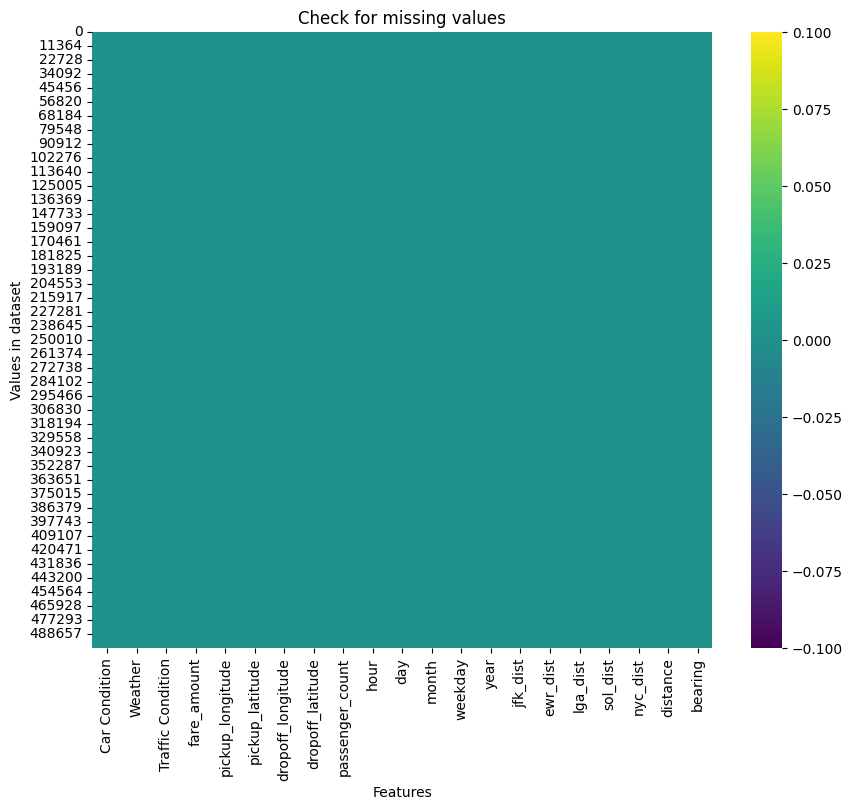

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(uberData.isnull(), cmap = 'viridis')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

In [26]:
uberData.dtypes

Car Condition          int64
Weather                int64
Traffic Condition      int64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

<h2>4) Checking Outliers and Correlations </h2>

<h4> Now We will check for outliers</h4>


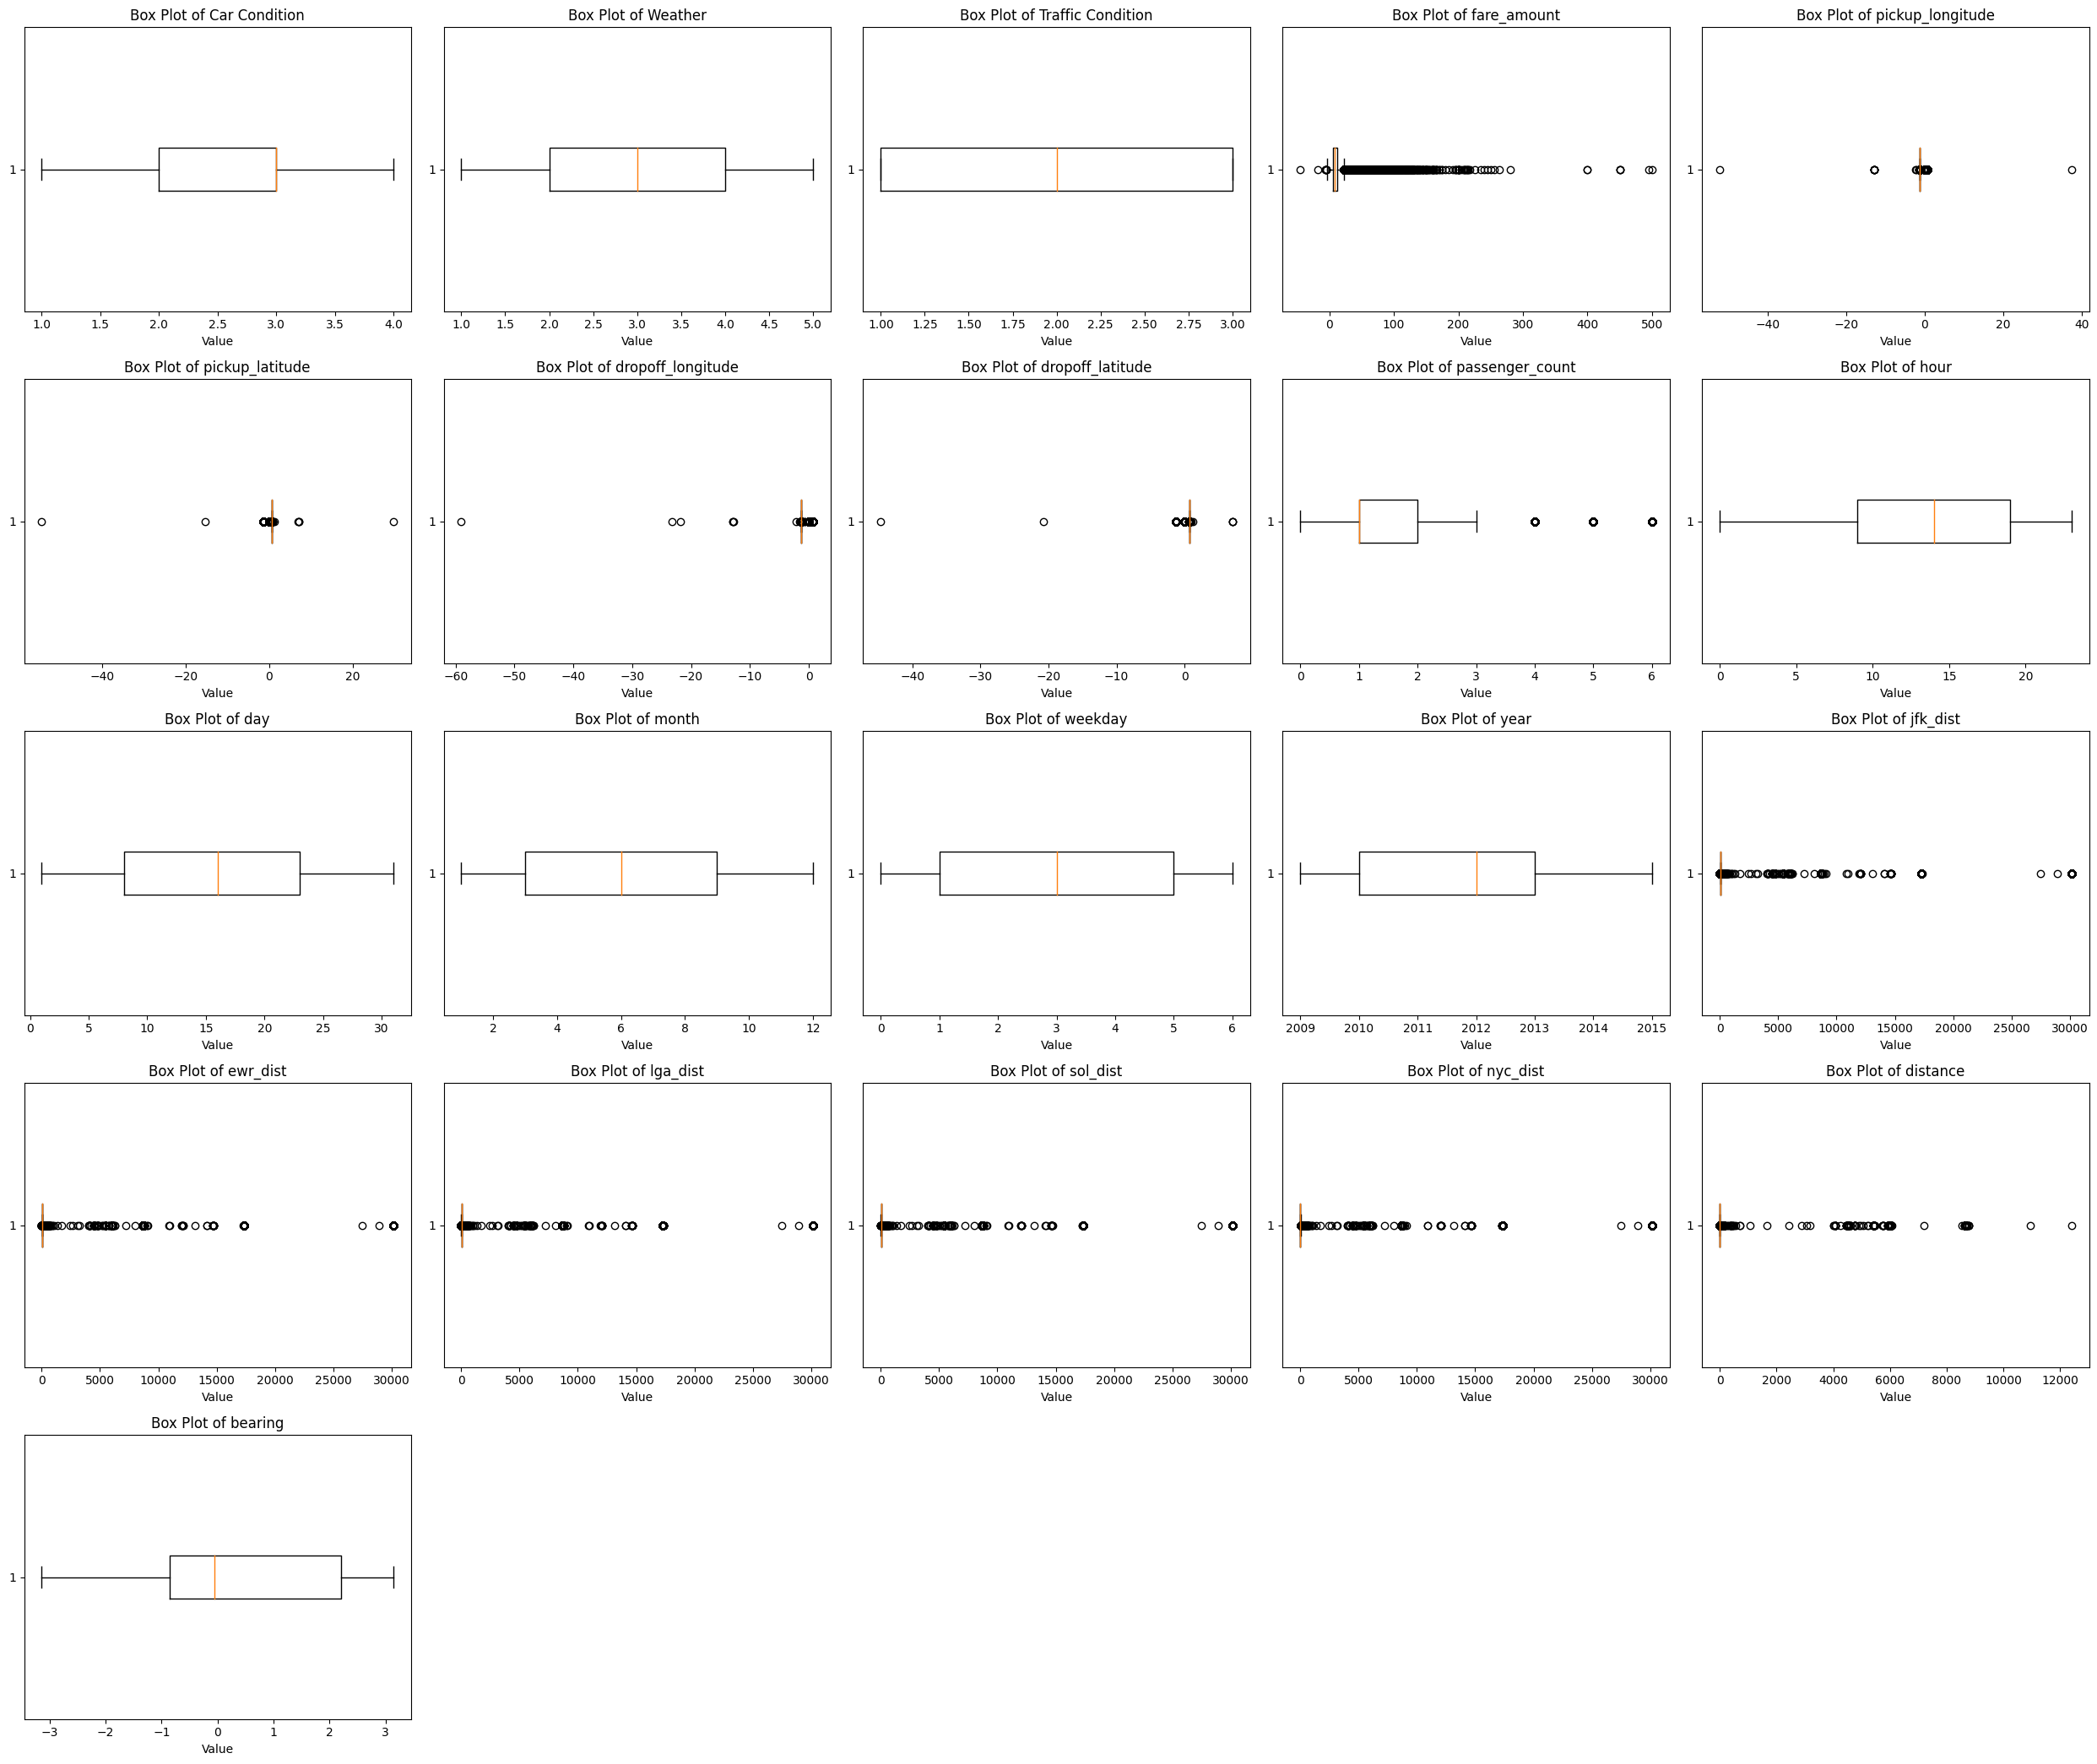

In [27]:
numerical_features = uberData.select_dtypes(include=['number','int','float'])

# Create separate box plots for each numerical feature
plt.figure(figsize=(25, 21))
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(5, 5, i+1 )
    plt.boxplot(numerical_features[feature], vert=False)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Value')
plt.tight_layout()

(0.0, 60.0)

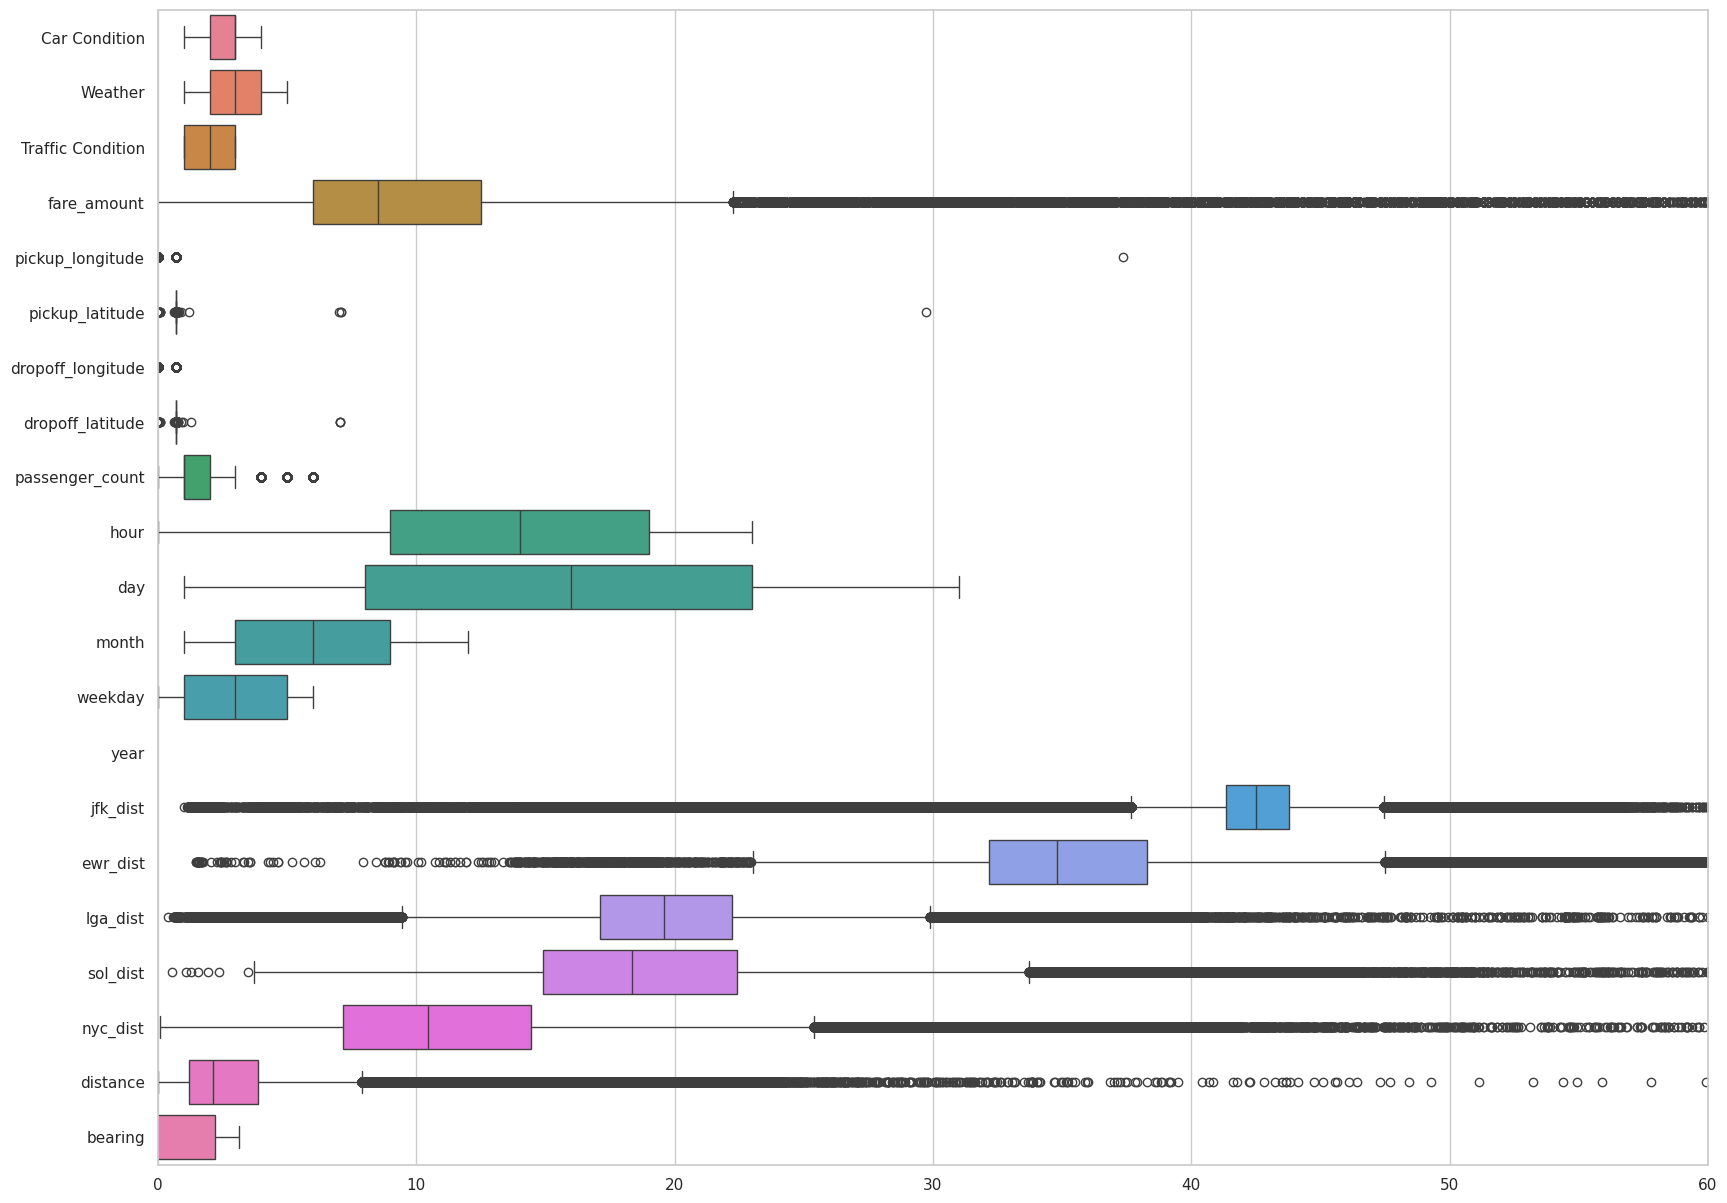

In [28]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(20,15))
sns.boxplot(data=uberData, orient="h")  # Set orient parameter to "h" to draw boxes horizontally
plt.xlim(0,60)

In [29]:
import pandas as pd
import numpy as np



# Define a function to remove outliers for a single column
def remove_outliers(column):
    mean = np.mean(column)
    std_dev = np.std(column)
    threshold = 3 * std_dev
    outliers = np.abs(column - mean) > threshold
    return column[~outliers]

# Create a new DataFrame to store the cleaned data
cleaned_data = pd.DataFrame()

# Iterate over each column in 'uberData'
for column in uberData.columns:
    cleaned_column = remove_outliers(uberData[column])
    cleaned_data[column] = cleaned_column

    
cleaned_data.dropna(inplace=True)

# Print the original and cleaned data
print("Original data:")
uberData.shape
print("\nCleaned data:")
cleaned_data.shape


Original data:

Cleaned data:


(466764, 21)

(0.0, 60.0)

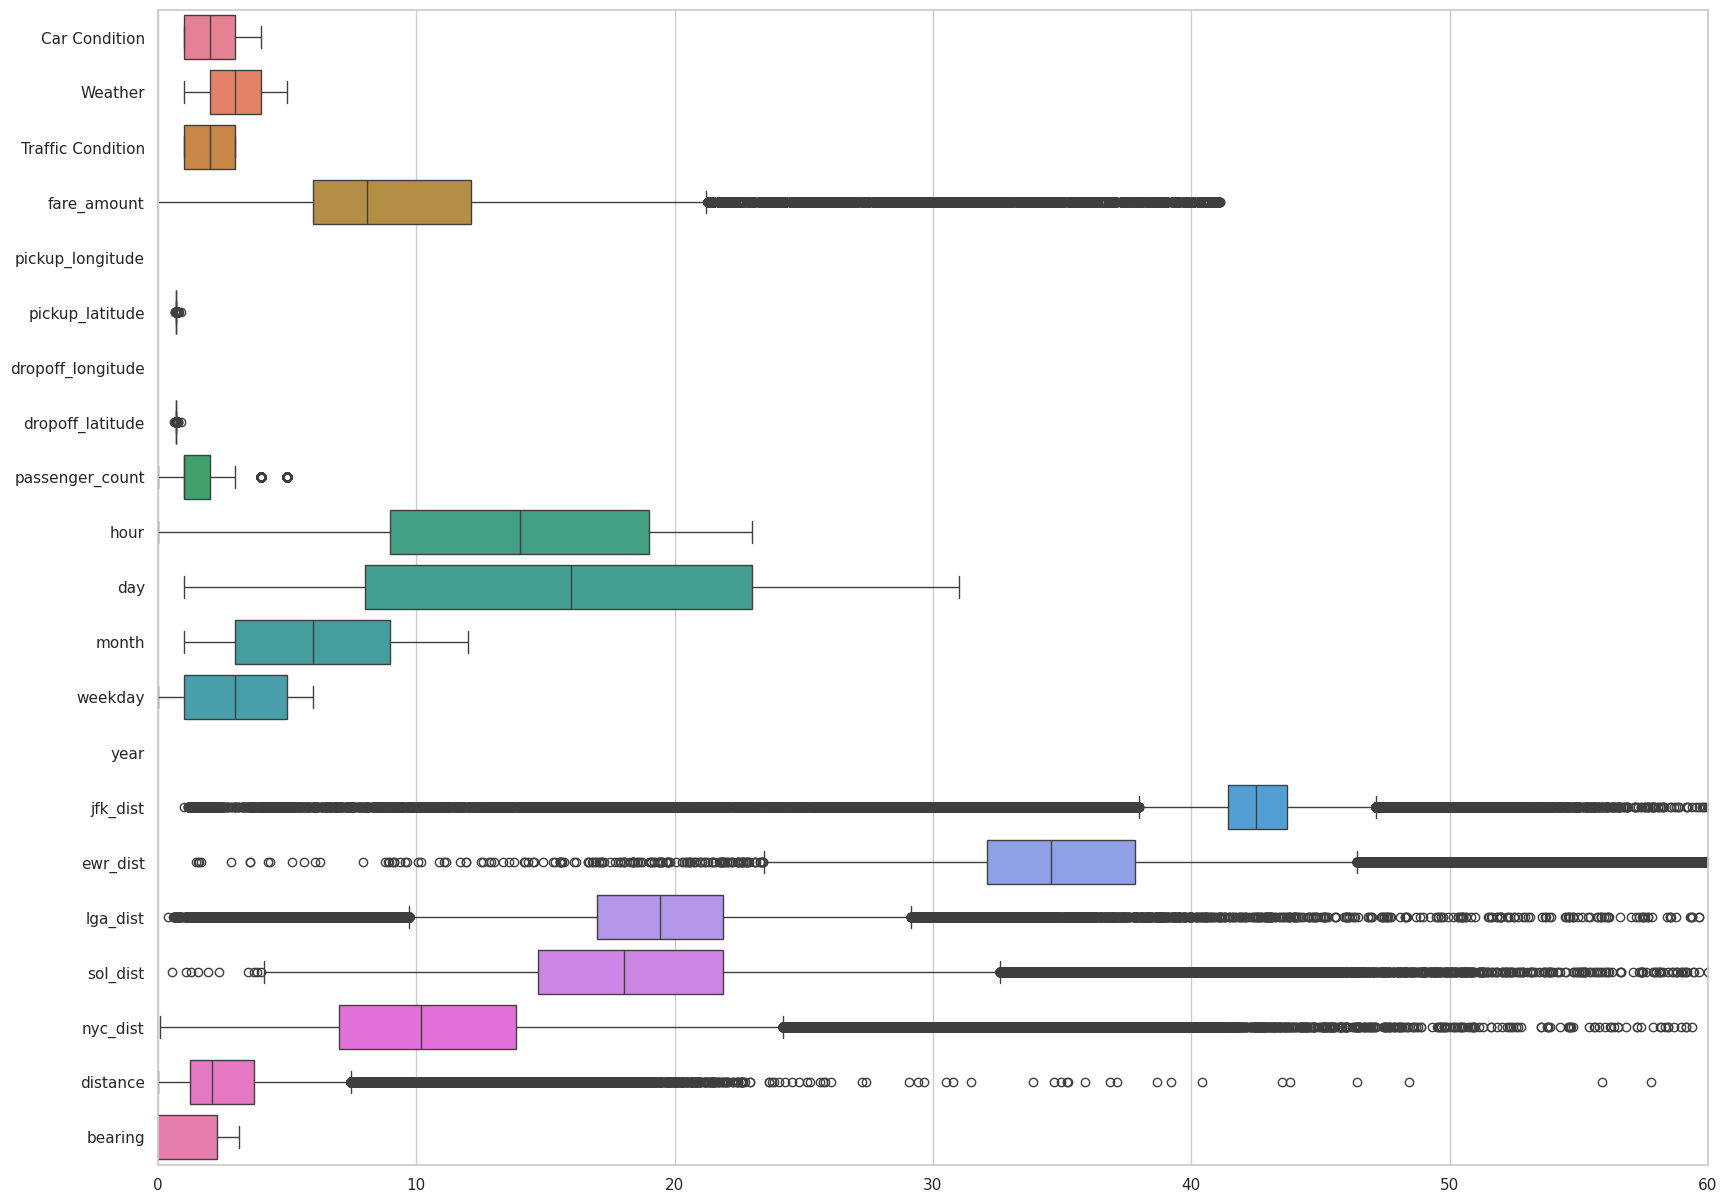

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))
sns.boxplot(data=cleaned_data, orient="h")  # Set orient parameter to "h" to draw boxes horizontally
plt.xlim(0,60)

<h4> After label encoding all of the data to be numbers either int or float now we can check the coorelation between them</h4>


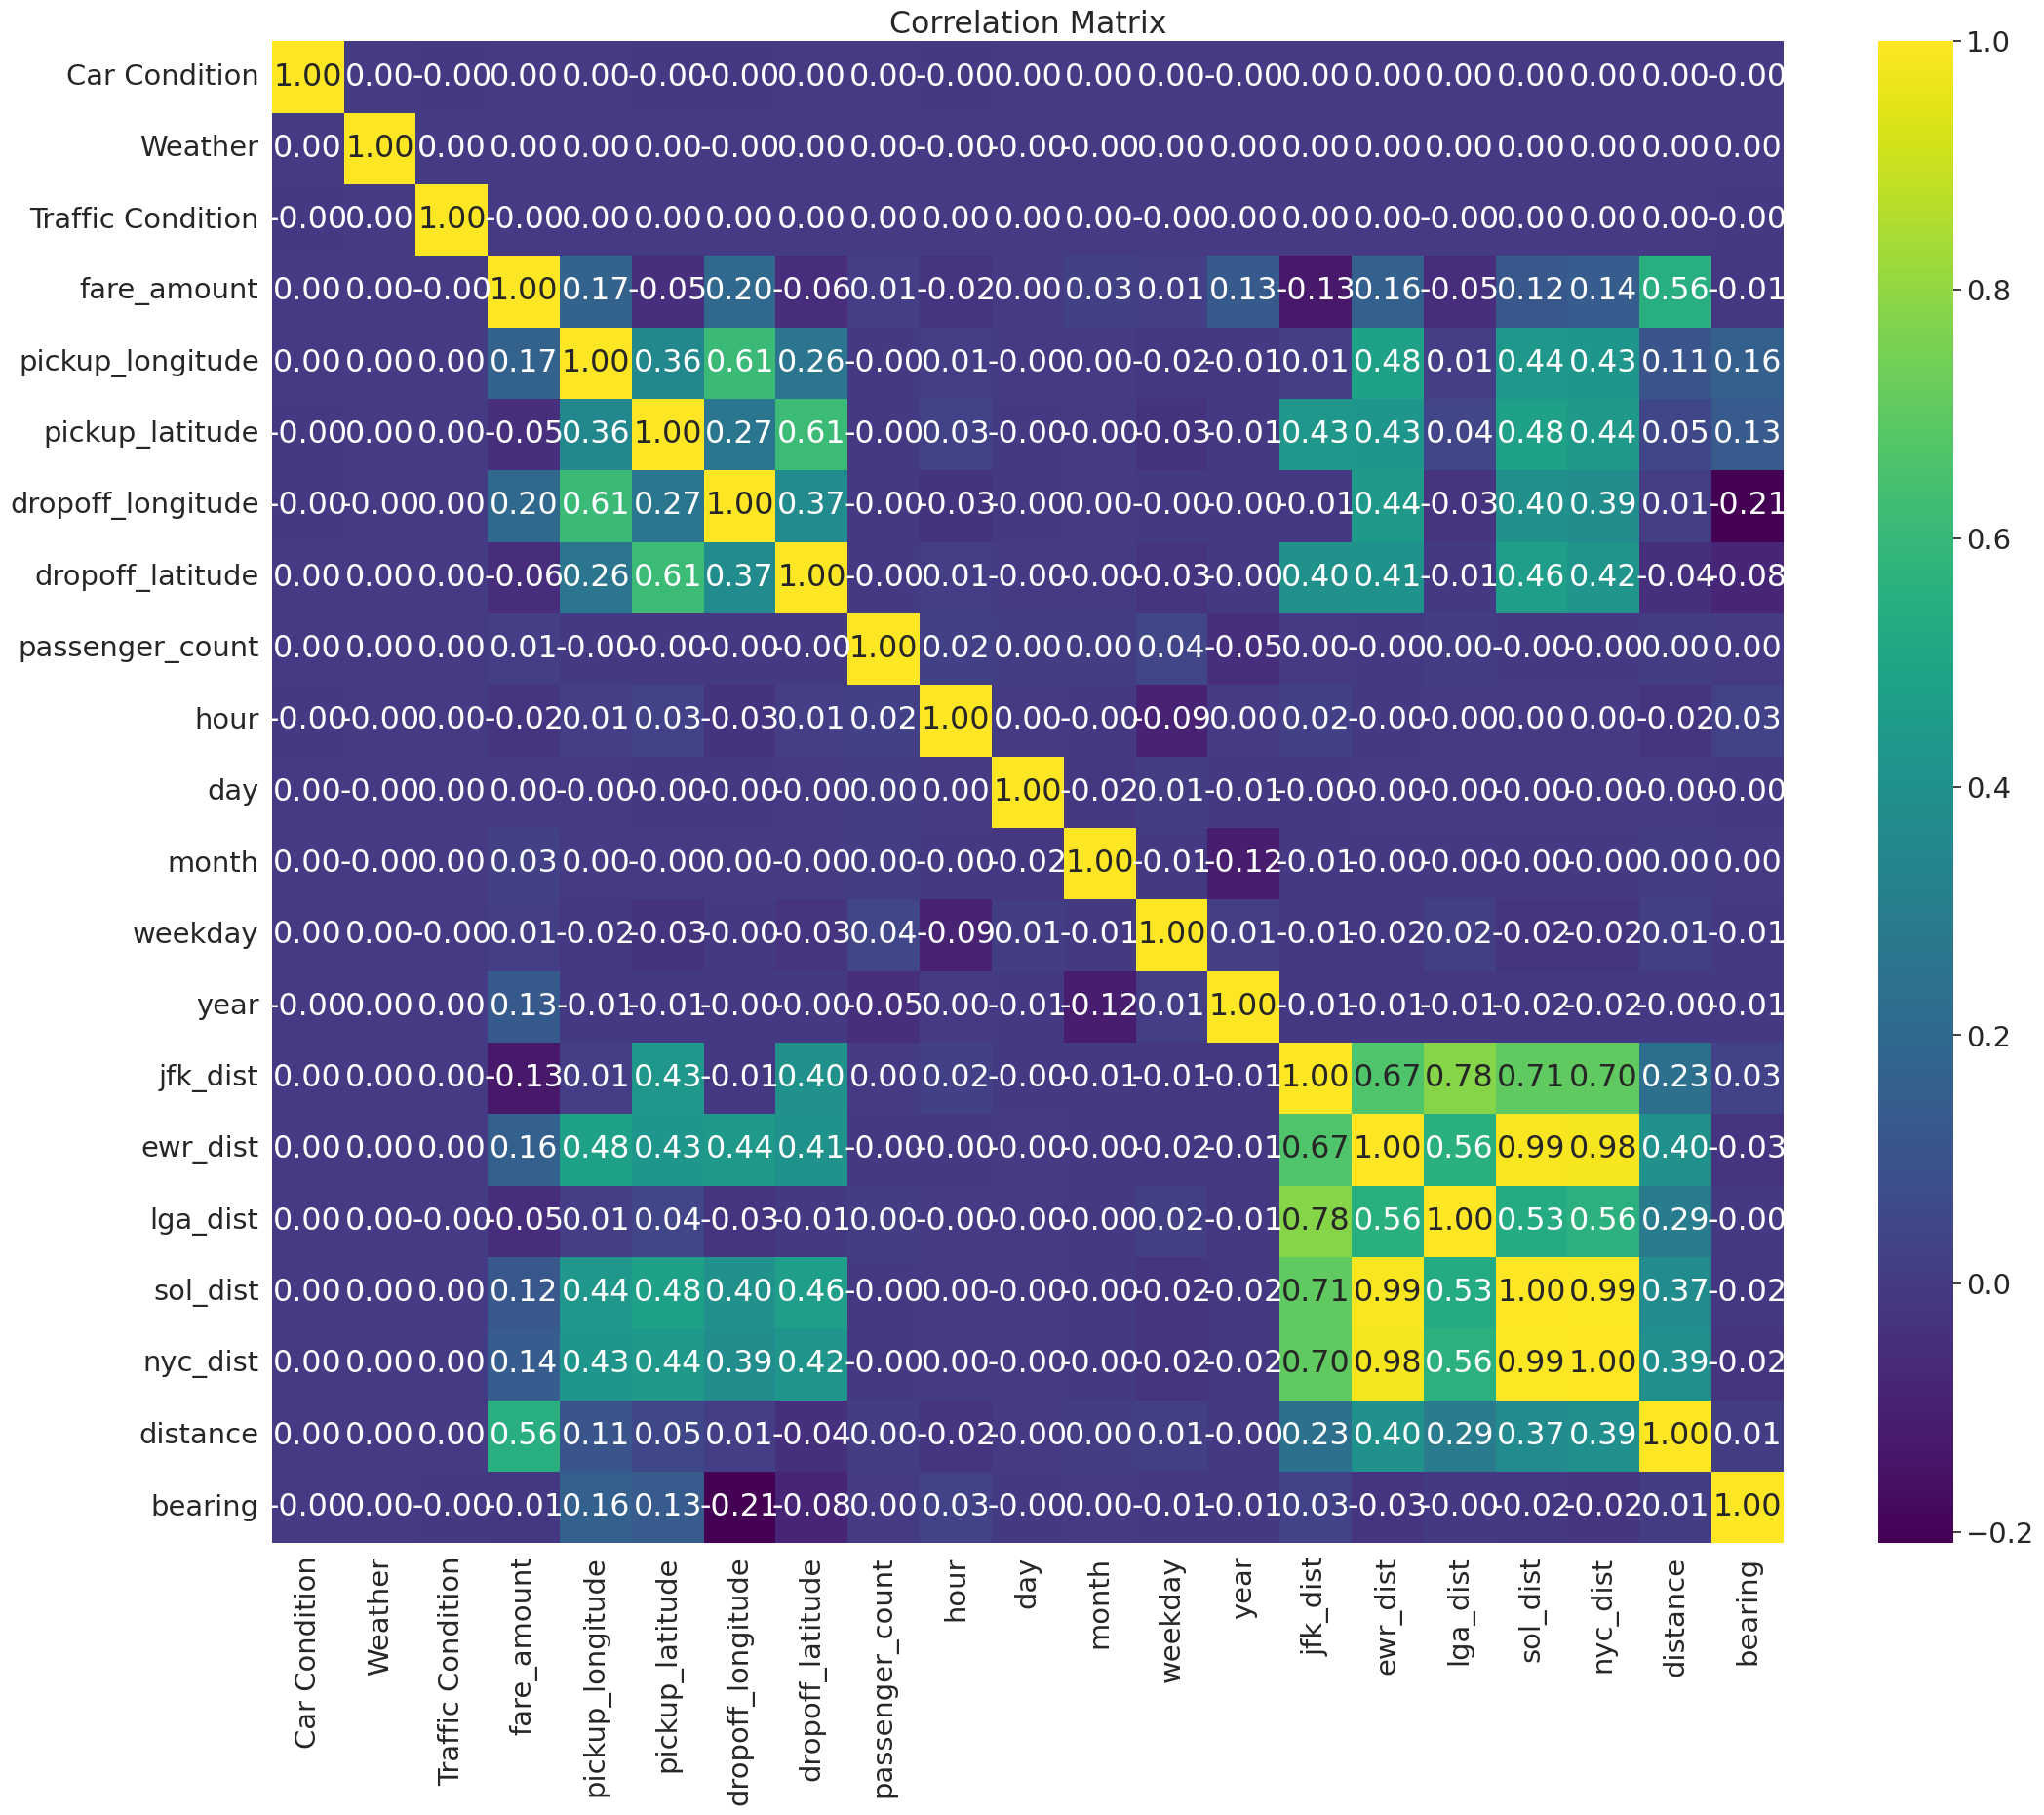

In [31]:
correlation_matrix = cleaned_data.corr()
sns.set(font_scale=1.9)
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap="viridis")
plt.title('Correlation Matrix')
plt.show()

<h4> Lets get the top 5 most correlating features to the target feature which is fare amount</h4>


In [32]:
uber_correlations = correlation_matrix['fare_amount'].drop('fare_amount')
sorted_correlations = uber_correlations.abs().sort_values(ascending=False)
top_features = sorted_correlations.head(5).index
top_features

Index(['distance', 'dropoff_longitude', 'pickup_longitude', 'ewr_dist',
       'nyc_dist'],
      dtype='object')

In [33]:
desc_sorted_correlations = uber_correlations.abs().sort_values(ascending=True)
worst_features = desc_sorted_correlations.head(5).index
worst_features

Index(['Traffic Condition', 'Car Condition', 'day', 'Weather',
       'passenger_count'],
      dtype='object')

In [34]:
cleaned_data.drop(worst_features, axis=1, inplace=True)

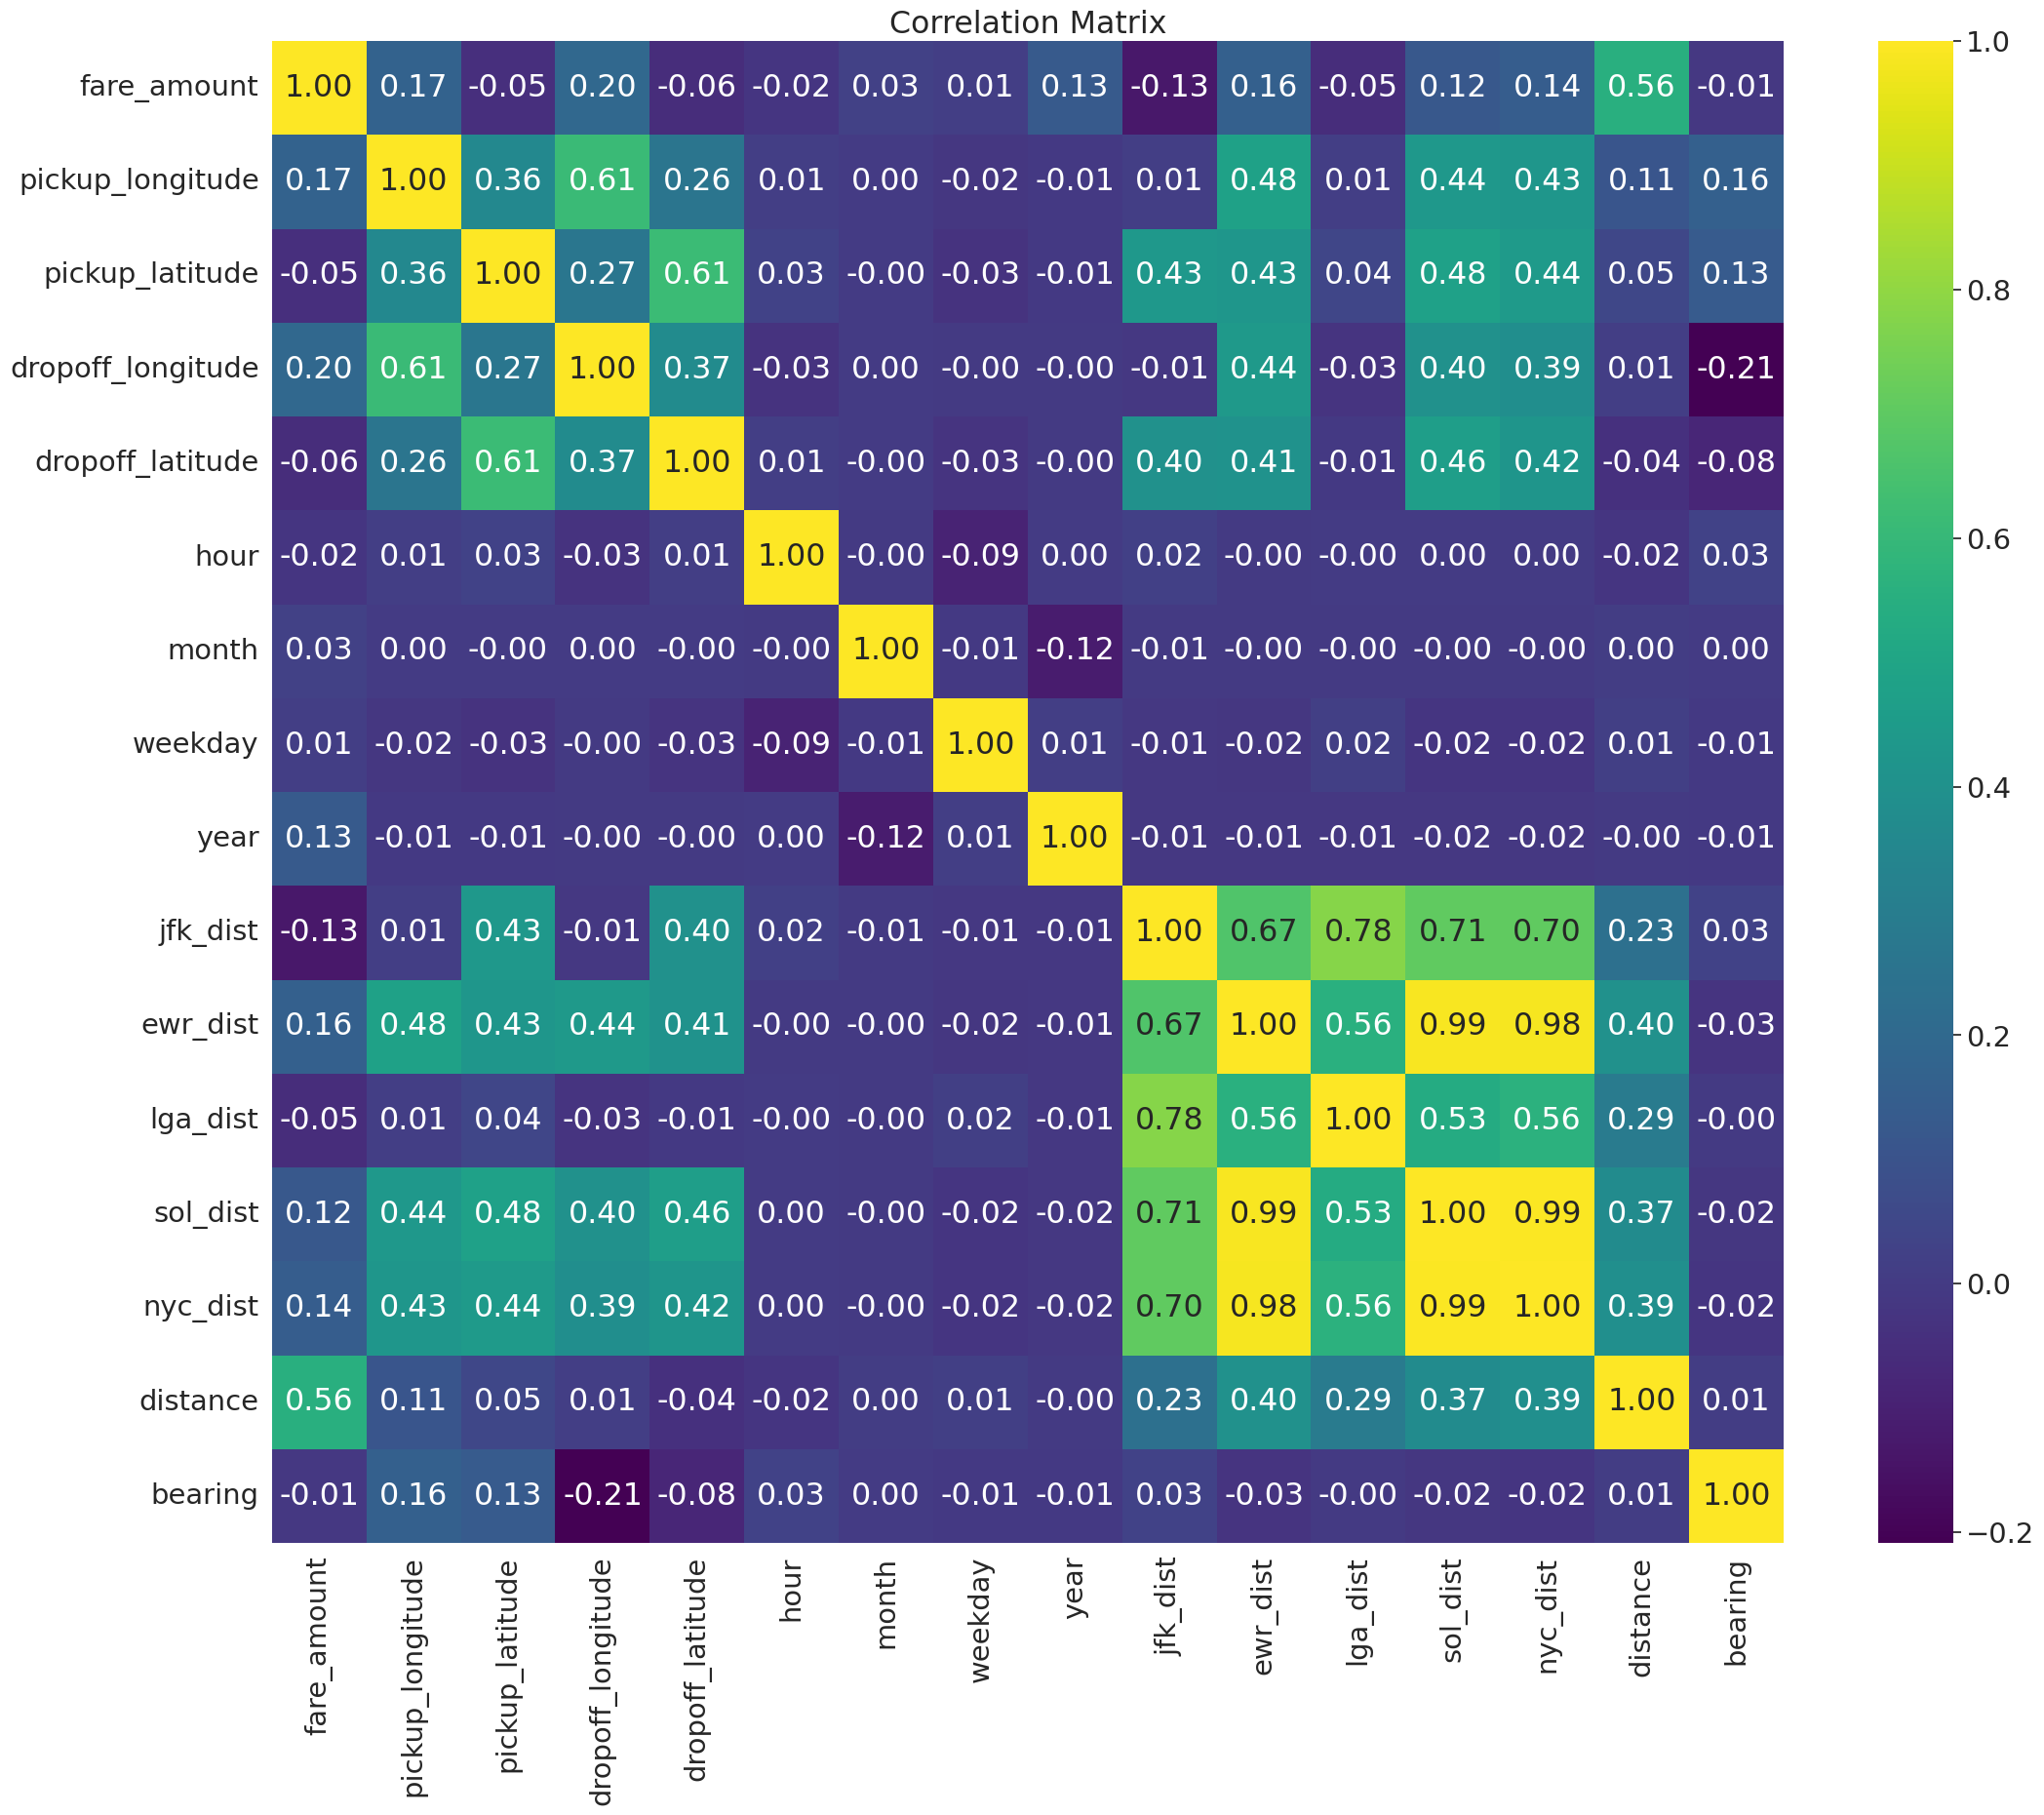

In [35]:
correlation_matrix = cleaned_data.corr()
sns.set(font_scale=1.9)
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap="viridis")
plt.title('Correlation Matrix')
plt.show()

<h2>5) Split the data </h2>

In [36]:

scaler = MinMaxScaler()

# Normalize X data
cleaned_datan = scaler.fit_transform(cleaned_data)
cleaned_datan = pd.DataFrame(cleaned_datan, columns=cleaned_data.columns)



x = cleaned_datan.drop(columns =['fare_amount']) 
y = cleaned_datan['fare_amount'] 


In [38]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

X_train.shape


(326734, 15)

In [39]:
X_test.shape

(140030, 15)

In [40]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,hour,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,0.487540,0.241609,0.601082,0.367449,0.739130,0.454545,0.000000,0.000000,0.007291,0.020220,0.005330,0.012838,0.010406,0.000956,0.035443
1,0.475176,0.240876,0.594698,0.371597,0.695652,0.000000,0.166667,0.166667,0.016534,0.011433,0.008685,0.005509,0.003284,0.007840,0.440282
2,0.477574,0.244532,0.594143,0.369726,0.000000,0.636364,0.500000,0.333333,0.016129,0.012140,0.007438,0.006489,0.003697,0.001289,0.913797
3,0.477258,0.242474,0.594128,0.370174,0.173913,0.272727,0.833333,0.500000,0.015767,0.011705,0.007895,0.005740,0.002885,0.002597,0.521312
4,0.478629,0.245025,0.595747,0.371701,0.304348,0.181818,0.166667,0.166667,0.016028,0.014284,0.005664,0.008757,0.005875,0.001855,0.419992


In [41]:
y.head()

0    0.381757
1    0.591216
2    0.402027
3    0.435811
4    0.395270
Name: fare_amount, dtype: float64

In [42]:
columns_to_keep =  ['distance', 'dropoff_longitude', 'pickup_longitude', 'ewr_dist',
       'nyc_dist']
X_train_filtered = X_train[columns_to_keep]
X_test_filtered = X_test[columns_to_keep]

In [43]:
# Linear Regression
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train_filtered, y_train)
lrpred = linear_model.predict(X_test_filtered)

# Calculate Mean Squared Error (MSE)
linear_mse = mean_squared_error(y_test, lrpred)

# Calculate Root Mean Squared Error (RMSE)
linear_rmse = np.sqrt(linear_mse)

# Print results
print(f"Linear Regression - Mean Squared Error: {linear_mse}")
print(f"Linear Regression - Root Mean Squared Error: {linear_rmse}")

Linear Regression - Mean Squared Error: 0.007793714529034758
Linear Regression - Root Mean Squared Error: 0.08828201701951965


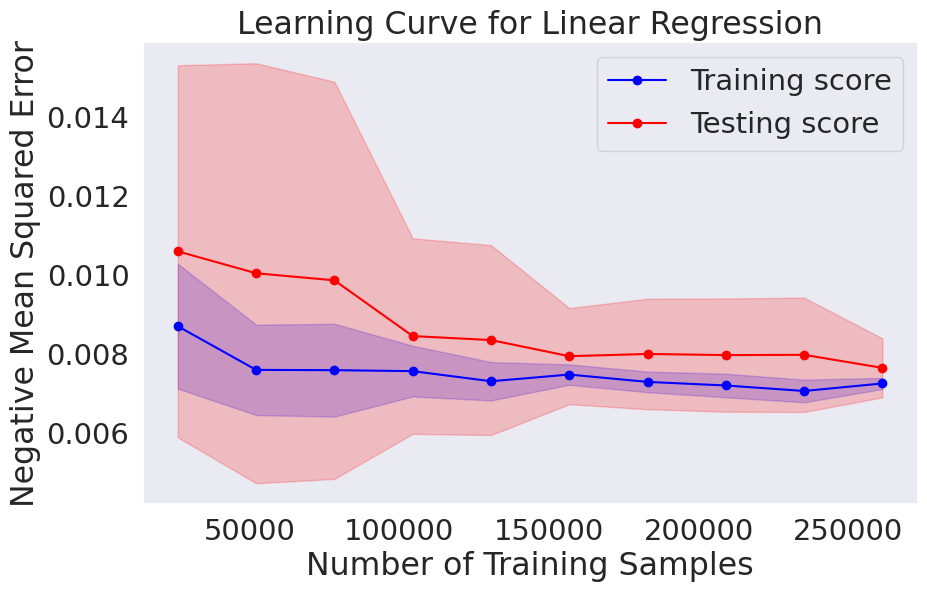

Relative Overfitting Score (%): [17.88855705 24.35629815 23.05167929 10.50144441 12.47640062  5.85938691
  8.83631761  9.65022094 11.46968549  5.16180823]
Average Overfitting Percentage: 12.93%


In [44]:
model = linear_model
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for Linear Regression')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
print("Relative Overfitting Score (%):", relative_overfitting_score)
linearOver = np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {linearOver:.2f}%")


In [45]:
# Ridge Regression with hyperparameter alpha
ridge_alpha = 0.9  # You can experiment with different values for alpha
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_filtered, y_train)
ridge_pred = ridge_model.predict(X_test_filtered)

# Calculate Mean Squared Error (MSE)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Calculate Root Mean Squared Error (RMSE)
ridge_rmse = np.sqrt(ridge_mse)

# Print results
print(f"Ridge Regression (alpha={ridge_alpha}) - Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression (alpha={ridge_alpha}) - Root Mean Squared Error: {ridge_rmse}")

Ridge Regression (alpha=0.9) - Mean Squared Error: 0.007564290027387562
Ridge Regression (alpha=0.9) - Root Mean Squared Error: 0.08697292697953521


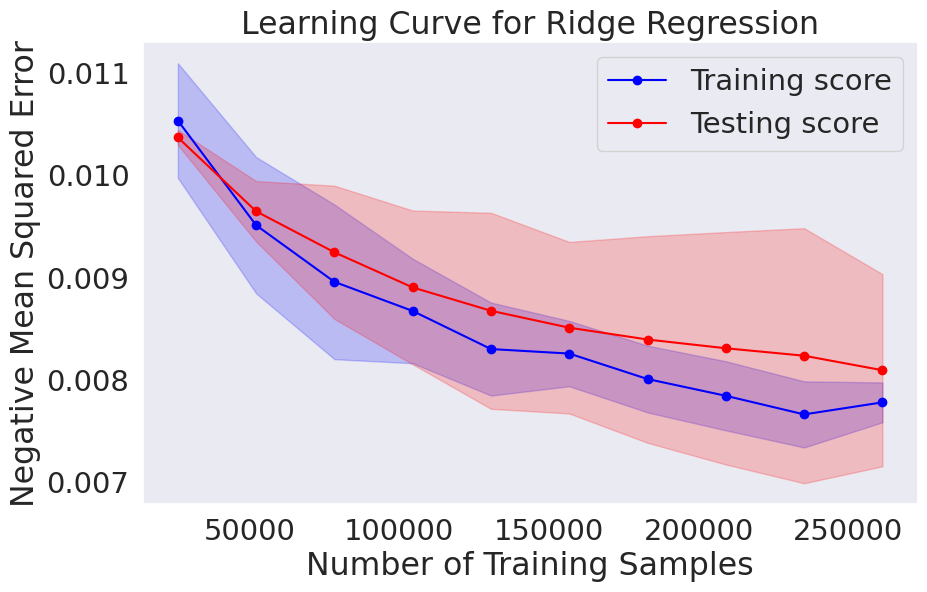

Relative Overfitting Score (%): [1.58980139 1.41294004 3.12082902 2.58317077 4.30863833 2.96901792
 4.59890719 5.58633003 6.95793639 3.87856576]
Average Overfitting Percentage: 3.70%


In [46]:
model = ridge_model
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
# Print the relative overfitting scores at each sample size point
print("Relative Overfitting Score (%):", relative_overfitting_score)

# Calculate and print the average overfitting percentage
ridgeOver = np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {ridgeOver:.2f}%")

In [47]:
# Polynomial Regression 
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train_filtered)
X_poly_test = poly_features.transform(X_test_filtered)  # Transform test set as well

poly_model = LinearRegression(n_jobs=-1)
poly_model.fit(X_poly_train, y_train)
prpred = poly_model.predict(X_poly_test)

# Calculate Mean Squared Error (MSE)
poly_mse = mean_squared_error(y_test, prpred)

# Calculate Root Mean Squared Error (RMSE)
poly_rmse = np.sqrt(poly_mse)

# Print results
print(f"Polynomial Regression - Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression - Root Mean Squared Error: {poly_rmse}")

Polynomial Regression - Mean Squared Error: 0.044466543492855184
Polynomial Regression - Root Mean Squared Error: 0.21087091665958865


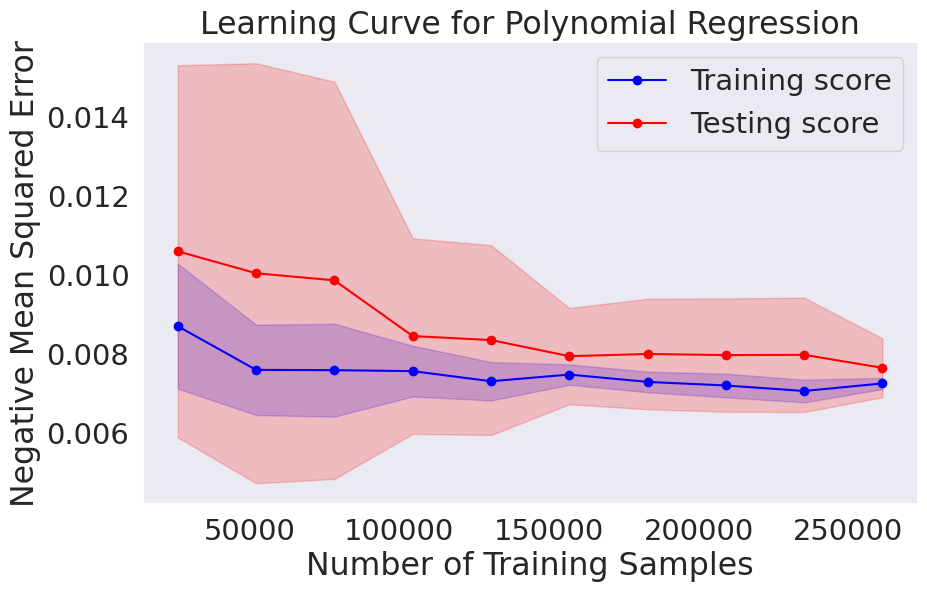

Relative Overfitting Score (%): [17.88855705 24.35629815 23.05167929 10.50144441 12.47640062  5.85938691
  8.83631761  9.65022094 11.46968549  5.16180823]
Average Overfitting Percentage: 12.93%


In [48]:
model = poly_model
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for Polynomial Regression')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
print("Relative Overfitting Score (%):", relative_overfitting_score)
polyOver= np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {polyOver:.2f}%")

In [49]:
dt_model = DecisionTreeRegressor(
    criterion='squared_error',  # 'mse' for Mean Squared Error, other options include 'mae' for Mean Absolute Error
    max_depth=7,    # Set the maximum depth of the tree
    min_samples_split=15,
    min_samples_leaf=2,
    max_features=18,  # 'sqrt' for square root of the number of features, 'log2' for log base 2 of the number of features, None for all features
    random_state=42  # Set a seed for reproducibility
)
dt_model.fit(X_train_filtered, y_train)
dtpred = dt_model.predict(X_test_filtered)
dt_mse = mean_squared_error(y_test,dtpred )

dt_mse = mean_squared_error(y_test, dtpred)


dt_rmse = np.sqrt(dt_mse)

# Print results
print(f"Decision Tree  - Mean Squared Error: {dt_mse}")
print(f"Decision Tree - Root Mean Squared Error: {dt_rmse}")

Decision Tree  - Mean Squared Error: 0.0025588648643880287
Decision Tree - Root Mean Squared Error: 0.05058522377520958


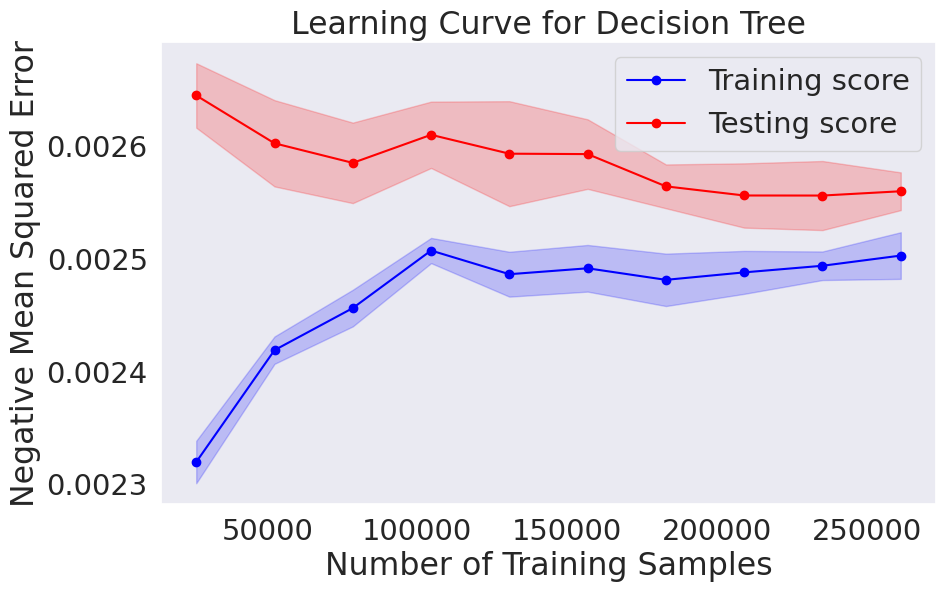

Relative Overfitting Score (%): [12.29420393  7.05047145  4.98244437  3.9329937   4.12262494  3.9066374
  3.23372065  2.66815682  2.43652551  2.22878302]
Average Overfitting Percentage: 4.69%


In [50]:
model = dt_model
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and standard deviation of training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for Decision Tree')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
print("Relative Overfitting Score (%):", relative_overfitting_score)
dtOver = np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {dtOver:.2f}%")

In [51]:
# Random Forest with hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',  # 'mse' for Mean Squared Error, 'mae' for Mean Absolute Error
    max_depth=5,    # Set the maximum depth of the trees
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',  # 'sqrt' for square root of the number of features, 'log2' for log base 2 of the number of features, None for all features
    max_samples=None,     # Set the maximum number or proportion of samples to draw
    random_state=42,
    n_jobs = -1  # Set a seed for reproducibility
)

rf_model.fit(X_train_filtered, y_train)
rf_pred = rf_model.predict(X_test_filtered)

# Perform evaluation (e.g., calculate MSE or RMSE)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

# Print results
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - Root Mean Squared Error: {rf_rmse}")

Random Forest - Mean Squared Error: 0.002779311248973873
Random Forest - Root Mean Squared Error: 0.05271917344736991


Starting learning curve computation...
Learning curve computation took 111.26889729499817 seconds


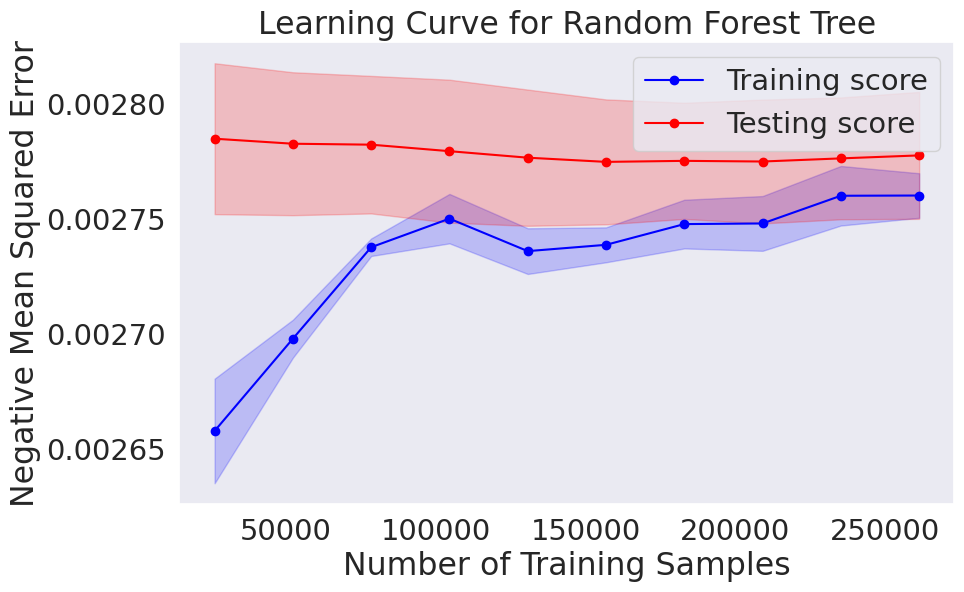

Relative Overfitting Score (%): [4.56309005 3.04638797 1.60281129 1.05550216 1.46309011 1.29970837
 0.99080978 0.97040419 0.58528036 0.62795263]
Average Overfitting Percentage: 1.62%


In [52]:
import time
model = rf_model
# Start timing the learning curve computation
start_time = time.time()
# Create a learning curve
print("Starting learning curve computation...")
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_filtered, y_train,
    cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1  # Utilize all available cores for parallelization
)

# Print the time taken for the learning curve computation
end_time = time.time()
print(f"Learning curve computation took {end_time - start_time} seconds")

# Calculate mean and standard deviation of training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for Random Forest Tree')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
print("Relative Overfitting Score (%):", relative_overfitting_score)
rfOver = np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {rfOver:.2f}%")

In [53]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=10,
    min_child_weight=4,
    subsample=1.0,
    colsample_bytree=0.75,
    gamma=1,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    n_jobs = -1
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Perform evaluation (e.g., calculate MSE or RMSE)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)

# Print results
print(f"XGBoost - Mean Squared Error: {xgb_mse}")
print(f"XGBoost - Root Mean Squared Error: {xgb_rmse}")

XGBoost - Mean Squared Error: 0.0023167587986328833
XGBoost - Root Mean Squared Error: 0.048132720665186625


Starting learning curve computation...
Learning curve computation took 19.63046360015869 seconds


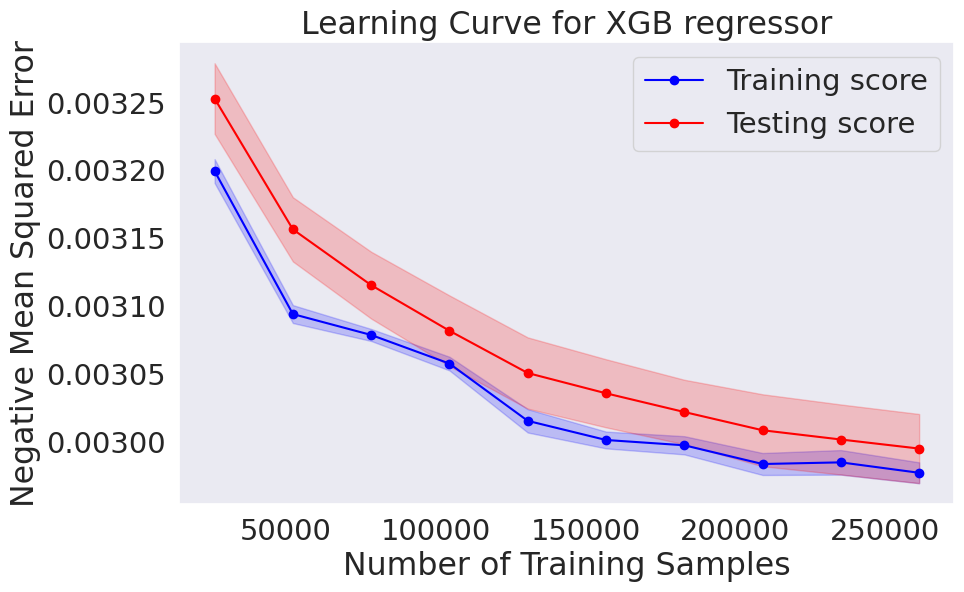

Relative Overfitting Score (%): [1.6425522  1.977629   1.17808076 0.78457597 1.155144   1.13324921
 0.81151692 0.82666148 0.5611002  0.59596025]
Average Overfitting Percentage: 1.07%


In [54]:
model = xgb_model
# Start timing the learning curve computation
start_time = time.time()

# Create a learning curve
print("Starting learning curve computation...")
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_filtered, y_train,
    cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1  # Utilize all available cores for parallelization
)

# Print the time taken for the learning curve computation
end_time = time.time()
print(f"Learning curve computation took {end_time - start_time} seconds")

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, marker='o', color='red', label='Testing score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative Mean Squared Error')
plt.title(f'Learning Curve for XGB regressor')
plt.legend()
plt.grid()
plt.show()

relative_overfitting_score = np.abs((train_mean - test_mean) / test_mean) * 100
print("Relative Overfitting Score (%):", relative_overfitting_score)
xgbOver = np.mean(relative_overfitting_score)
print(f"Average Overfitting Percentage: {xgbOver:.2f}%")

In [55]:
# Assuming you have a dictionary containing model errors like this:
model_errors = {
    'Linear Regression': (linear_mse, linear_rmse),
    'Ridge Regression': (ridge_mse, ridge_rmse),
    'Polynomial Regression': (poly_mse,poly_rmse),
    'Decision Tree': (dt_mse,dt_rmse),
    'Random Forest': (rf_mse, rf_rmse),
    'XGBoost': (xgb_mse, xgb_rmse)
    # Add other models as needed
}

# Find the model with the lowest RMSE
best_model_name = min(model_errors, key=lambda k: model_errors[k][1])
best_model_rmse = model_errors[best_model_name][1]

# Print results
print(f"Best Model: {best_model_name}")
print(f"RMSE of the Best Model: {best_model_rmse}")

# Compare other models to the best model
for model_name, (mse, rmse) in model_errors.items():
    improvement = best_model_rmse - rmse
    if model_name == best_model_name:
        print(f"{model_name} is the Best Model.")
    elif improvement > 0:
        print(f"{model_name} is {improvement:.2f} units better than the Best Model.")
    else:
        print(f"{model_name} is {-improvement:.2f} units worse than the Best Model.")

  
    print()

overfitting_scores = {
    'Linear Regression': linearOver,
    'Ridge Regression': ridgeOver,
    'Polynomial Regression': polyOver,
    'Decision Tree': dtOver,
    'Random Forest': rfOver,
    'XGBoost': xgbOver
}    

leastOver = min(overfitting_scores, key=overfitting_scores.get)
print(f"The least Overfitting model is: {leastOver} with a score of {overfitting_scores[leastOver]:.2f}%")


Best Model: XGBoost
RMSE of the Best Model: 0.048132720665186625
Linear Regression is 0.04 units worse than the Best Model.

Ridge Regression is 0.04 units worse than the Best Model.

Polynomial Regression is 0.16 units worse than the Best Model.

Decision Tree is 0.00 units worse than the Best Model.

Random Forest is 0.00 units worse than the Best Model.

XGBoost is the Best Model.

The least Overfitting model is: XGBoost with a score of 1.07%


In [56]:
from joblib import dump

In [60]:
dump(xgb_model, './savedModel/xgb.joblib')

['./savedModel/xgb.joblib']

In [66]:
scale = MinMaxScaler()

# Normalize X data
cleaned_datan = scale.fit_transform(cleaned_data.drop(columns =['fare_amount']))
dump(scale, './savedModel/scaler.joblib')

['./savedModel/scaler.joblib']